<a href="https://colab.research.google.com/github/hpc-shiksha/Basics_of_HPC/blob/main/nsm_ml_logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression for the Iris dataset 

This code builds a three-class classification model for the Iris dataset. We take 2-dimensional $\mathbf{x}$ (Sepal Length and Petal Length) so that we can visualize the results using 2-d plots. 


This example is adapted from [sklearn](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html) (Licensed under BSD 3 clause). 

In [ ]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# Modified for NSM ML course by Clint P. George
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score

# Imports data for experimentation 
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]  
Y = iris.target

print("Data dimention: ",  X.shape[1])
print("Number of samples: ",  X.shape[0])
print("Features selected: ", iris.feature_names[0], ", ", iris.feature_names[2])
print("Classes selected: ", iris.target_names)

Data dimention:  2
Number of samples:  150
Features selected:  sepal length (cm) ,  petal length (cm)
Classes selected:  ['setosa' 'versicolor' 'virginica']


Fit the logistic regression model

In [ ]:
# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e3)
logreg.fit(X, Y)

# Prediction on the training set 
Y_pred = logreg.predict(X)
print("Prediction accuracy on the training data: ", accuracy_score(Y, Y_pred))

Prediction accuracy on the training data:  0.9666666666666667


Plots the decision boundary 

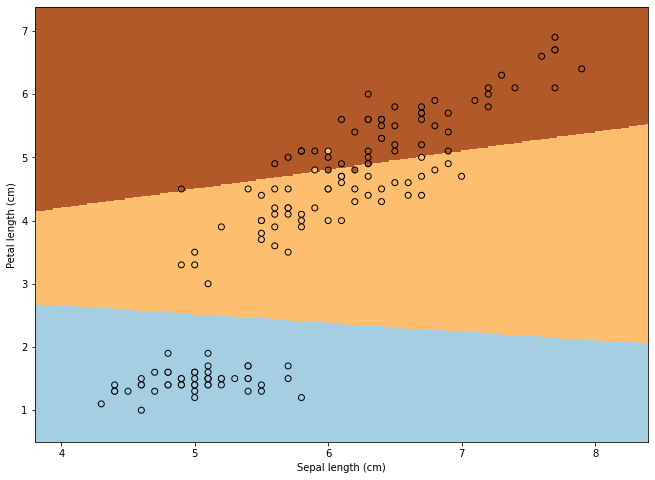

In [ ]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max] x [y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(11, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plots the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()